In [1]:
pip install opencv-python

In [3]:
import cv2

In [4]:
print(cv2.__version__)

4.11.0


In [5]:
import os
print(os.getcwd())  # Sprawdza bieżący katalog
print(os.listdir())  # Wyświetla pliki w katalogu

c:\PRACA\IT\TABLICA\sample jpg\OpenCV_Scikit-image
['.git', 'OpenCV_SKI.ipynb', 'README.md', 'sample.jpg']


In [6]:
obraz = cv2.imread("sample.jpg")
if obraz is None:
    print("Błąd: Nie udało się wczytać obrazu!")
else:
    print("Obraz wczytany poprawnie!")

Obraz wczytany poprawnie!


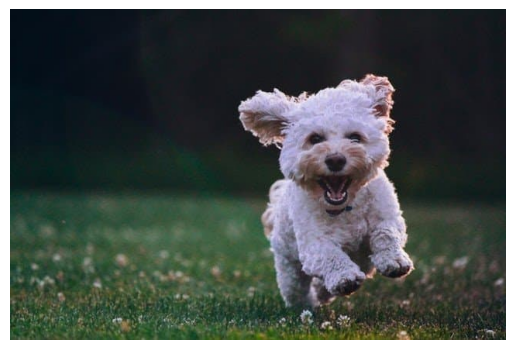

In [7]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

sciezka = r"C:\PRACA\IT\TABLICA\sample jpg\OpenCV_Scikit-image\sample.jpg"
obraz = cv2.imread(sciezka)

# Konwersja BGR → RGB 
obraz = cv2.cvtColor(obraz, cv2.COLOR_BGR2RGB)

# Wyświetlenie obrazu
plt.imshow(obraz)
plt.axis("off")
plt.show()

Konwersja obrazu do skali szarości

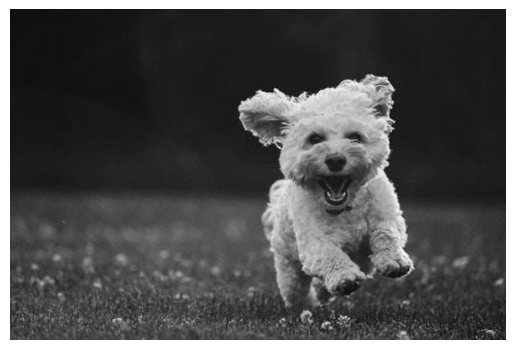

In [8]:
obraz_szary = cv2.cvtColor(obraz, cv2.COLOR_BGR2GRAY)

plt.imshow(obraz_szary, cmap="gray")
plt.axis("off")
plt.show()

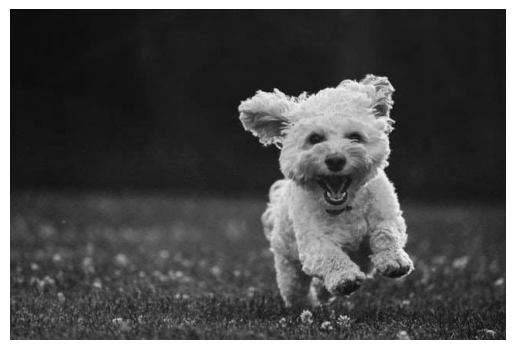

In [9]:
import numpy as np

obraz_szary_manual = np.mean(obraz, axis=2)

plt.imshow(obraz_szary_manual, cmap="gray")
plt.axis("off")
plt.show()

Wykrywanie krawędzi metodą Canny’ego:

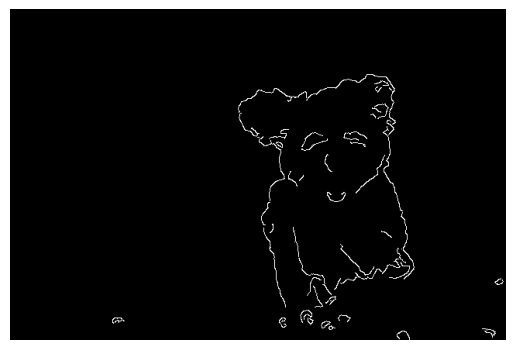

In [87]:
blurred = cv2.GaussianBlur(obraz_szary, (7, 7), 0)
edges = cv2.Canny(blurred, 100, 220)

plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

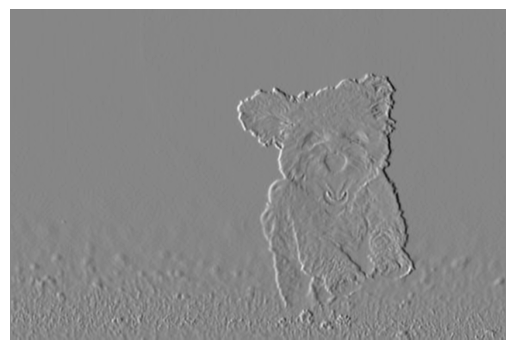

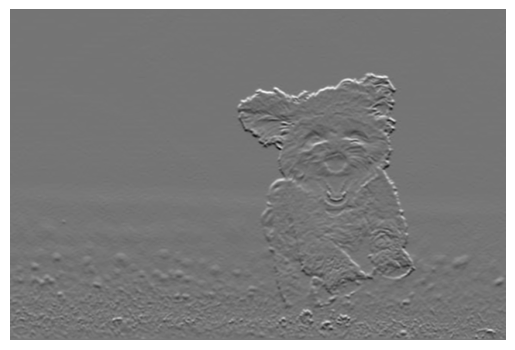

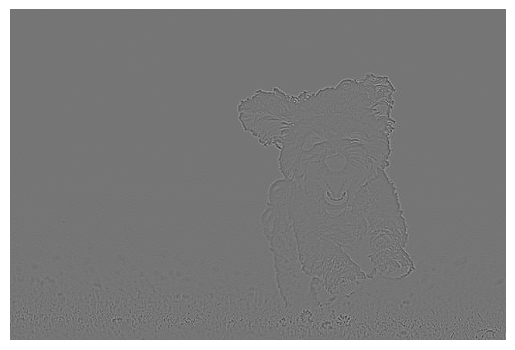

In [11]:
sobel_x = cv2.Sobel(obraz_szary, cv2.CV_64F, 1, 0, ksize=5)  # Gradient w poziomie
sobel_y = cv2.Sobel(obraz_szary, cv2.CV_64F, 0, 1, ksize=5)  # Gradient w pionie
plt.imshow(sobel_x, cmap="gray")
plt.axis("off")
plt.show()
plt.imshow(sobel_y, cmap="gray")
plt.axis("off")
plt.show()

laplacian = cv2.Laplacian(obraz_szary, cv2.CV_64F)
plt.imshow(laplacian, cmap="gray")
plt.axis("off")
plt.show()

Filtr Gaussa do redukcji szumu:

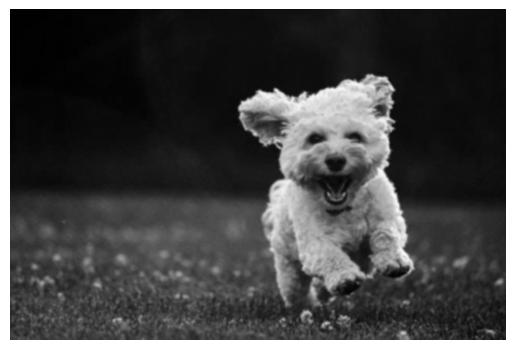

In [12]:
blur = cv2.GaussianBlur(obraz_szary, (5,5), 0)
plt.imshow(blur, cmap="gray")
plt.axis("off")
plt.show()

Znalezienie konturów

[61.5, 53.5, 46.5, 44.0, 34.0, 31.5, 30.0, 26.0, 21.0, 20.0, 19.0, 18.5, 16.5, 16.0, 15.5, 15.5, 12.5, 11.5, 11.5, 11.0, 11.0, 10.0, 10.0, 9.5, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.5, 7.5, 7.5, 7.0, 6.5, 6.0, 6.0, 6.0, 6.0, 5.5, 5.0, 5.0, 5.0, 4.0, 3.5, 2.5, 1.0, 0.0, 0.0]


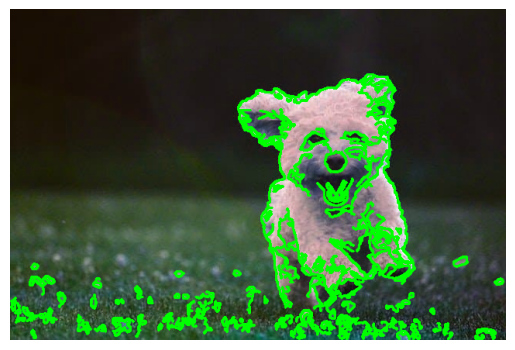

In [91]:
kontury, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(c) for c in kontury]
print(sorted(areas, reverse=True))

if areas:
    min_area = np.percentile(areas, 70)  
    kontury = [c for c in kontury if cv2.contourArea(c) > min_area]

cv2.drawContours(obraz_kontury, kontury, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(obraz_kontury, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

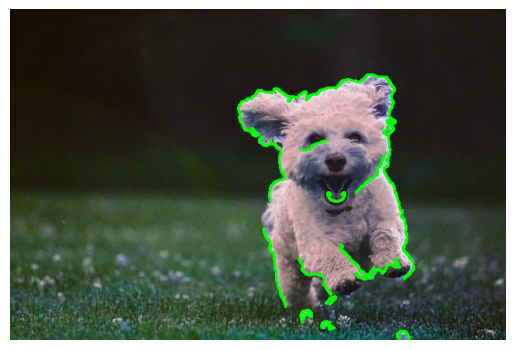

In [111]:
kontury, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
kontury = [c for c in kontury if cv2.contourArea(c) > 11] 
obraz_kontury = obraz.copy()

cv2.drawContours(obraz_kontury, kontury, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(obraz_kontury, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Segmentacja:

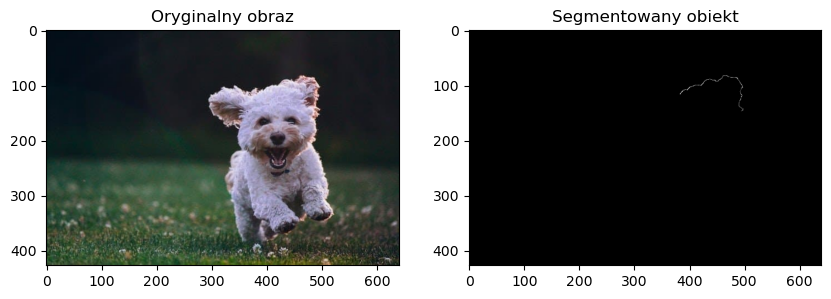

In [110]:
najwiekszy_kontur = max(kontury, key=cv2.contourArea)
maska = np.zeros_like(obraz_szary)
cv2.drawContours(maska, [najwiekszy_kontur], -1, 255, thickness=cv2.FILLED)

segmentacja = cv2.bitwise_and(obraz_szary, obraz_szary, mask=maska)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(obraz, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmentowany obiekt")
plt.imshow(segmentacja, cmap="gray")

plt.show()